# All PREPARE

## IMPORT Data and libraries

In [35]:
import pandas as pd 
import numpy as np
from pathlib import Path
import openpyxl
import seaborn as sns

In [36]:
docs_folder = Path(Path.cwd()/'docs')
data_upload = Path(docs_folder/ 'Выгрузка.xlsx')
data_plan = Path(docs_folder/ 'План.xlsx')
df_upload_raw = pd.read_excel(data_upload)

## PREPARE DATA 1 df_upload

In [37]:
df_upload_raw = pd.read_excel(data_upload,date_format=['Дата'])
df_upload_raw['Время начала (5-29)'] = pd.to_datetime(df_upload_raw['Время начала (5-29)'], format="%H:%M:%S").dt.time
df_upload_raw = df_upload_raw.rename(columns={
    'Ролик ID выхода'               :'ID_release',
    'Дата'                          :'date',
    'Время начала (5-29)'           :'time_begin',
    'Блок Распространение'          :'distribution_ch',
    'Ролик Тип'                     :'promo_video',
    "Ролик Ожидаемая длительность"  :'p_vid_duration',
    'Ролик Тип позиции в блоке'     :'p_vid_position',
    "Ролик ID"                      :'p_vid_ID',
    'Телекомпания'                  :'telecomp',
    "TVR All 25-55"                 :'TVR'

})
df_upload_raw[['p_vid_duration','TVR']] = df_upload_raw[['p_vid_duration','TVR']].apply(pd.to_numeric)
df_upload_raw['month'] = df_upload_raw.date.dt.month
# df_upload_raw.distribution_ch.value_counts()

df_upload_raw

,ID_release,date,time_begin,distribution_ch,promo_video,p_vid_duration,p_vid_position,p_vid_ID,telecomp,TVR,month
0,3993021159,2021-01-01,11:42:56,Сетевой,Ролик,30,Средний,4071244,СТС,1.2241,1
1,3993028828,2021-01-01,12:47:32,Сетевой,Ролик,30,Средний,4071244,СТС,1.5175,1
2,3993028884,2021-01-01,13:39:10,Сетевой,Ролик,30,Средний,4071242,СТС,1.7943,1
3,3993033088,2021-01-01,19:29:37,Сетевой,Ролик,30,Средний,4071243,СТС,2.1209,1
4,3993033214,2021-01-01,21:36:44,Сетевой,Ролик,30,Средний,4071244,СТС,3.1136,1
...,...,...,...,...,...,...,...,...,...,...,...
3961,4308641595,2021-11-30,08:04:37,Сетевой,Ролик,10,Средний,4183478,ТНТ,0.3673,11
3962,4310166381,2021-11-30,10:35:32,Сетевой,Ролик,10,Средний,4183478,ТНТ,0.2984,11
3963,4310166442,2021-11-30,11:30:43,Сетевой,Ролик,10,Средний,4183478,ТНТ,0.5303,11
3964,4310043335,2021-11-30,13:42:15,Сетевой,Ролик,10,Средний,4183478,ПЯТНИЦА,0.4929,11


## PREPARE DATA 2 data_plan

In [42]:
df_data_plan = pd.read_excel(data_plan)
df_data_plan

,Unnamed: 0,Бюджет,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,Телеканал,Январь,Февраль,Март,Апрель,Май,Июнь,Июль,Август,Сентябрь,...,Апрель,Май,Июнь,Июль,Август,Сентябрь,Октябрь,Ноябрь,Декабрь,Все месяцы
1,Первый,7884602.803572,0,9325322.326273,0,8298681.336225,0,5322491.882782,0,6097343.013187,...,0,53.590305,0,53.590305,0,51.309867,0,51.309867,0,316.980954
2,Россия 1,4201969.306477,0,4969777.066038,0,4422645.645924,0,2836534.456155,0,3231548.528172,...,0,33.493508,0,33.493508,0,32.068252,0,32.068252,0,198.110536
3,ТНТ,16439205.739995,0,19443071.024951,0,17302549.444222,0,11097266.570089,0,12597611.131267,...,0,124.432445,0,124.432445,0,119.137447,0,119.137447,0,736.004674
4,СТС,18759580.889772,0,22187438.335343,0,19744784.573654,0,12663633.095757,0,14382250.808125,...,0,151.978301,0,151.978301,0,145.511139,0,145.511139,0,898.935482
5,РЕН ТВ,10620063.017028,0,12560621.406858,0,11177800.701516,0,7169061.094259,0,8156041.607382,...,0,159.977724,0,159.977724,0,153.170161,0,153.170161,0,946.251216
6,Пятница,13702850.794139,0,16206713.721367,0,14422488.357547,0,9250093.370555,0,10506739.796532,...,0,131.583309,0,131.583309,0,125.98402,0,125.98402,0,778.301277
7,ИТОГО,71608272.550985,0,84692943.88083,0,75368950.059088,0,48339080.469598,0,54971534.884666,...,0,655.055592,0,655.055592,0,627.180886,0,627.180886,0,3874.58414


In [46]:
def mapping_df(df_data_plan):

    b_ind = df_data_plan.columns.get_loc('Бюджет')
    trp_ind = df_data_plan.columns.get_loc('TRP')-1
    bud = ['Бюджет' for i in range(trp_ind-b_ind+1)]
    trp = ['TRP' for i in range(trp_ind-b_ind+1)]
    df_data_plan.columns = df_data_plan.iloc[0,:]
    df_data_plan = df_data_plan.drop(0,axis=0)

    df_data_plan = df_data_plan.rename(columns={'Телеканал':'telecomp'})
    df_data_plan.index=df_data_plan.telecomp
    new = df_data_plan.drop(columns='telecomp').T
    
    new_1 = new.rename(columns={0:"month"})
    new_1 = new_1.apply(pd.to_numeric)



    df_plan, df_result = np.split(new_1, 2)
    return df_plan.T,df_result.T

In [52]:
def mapping_to_numeric_date(df_):
    month_rus   = ['Январь'	,'Февраль',	'Март','Апрель','Май','Июнь','Июль','Август','Сентябрь','Октябрь','Ноябрь','Декабрь']
    month_numb  = list(range(1,13))

    df_ = df_.rename(columns=dict(zip(month_rus,month_numb))).reset_index()
    df_ = df_.rename(columns={'Телеканал':'telecomp'})
    return df_

In [47]:

df_budget_raw,df_trp_raw= mapping_df(df_data_plan=df_data_plan)



In [54]:
df_budget = mapping_to_numeric_date(df_budget_raw)
df_trp = mapping_to_numeric_date(df_trp_raw)

## New

In [55]:
# Группировка
df_group_upload= (
    df_upload_raw[['telecomp','TVR','month']]
    .groupby(['telecomp','month'])
    .agg(sum).reset_index()
    )
df_group_upload.head(7)

,telecomp,month,TVR
0,ПЕРВЫЙ КАНАЛ,1,53.7164
1,ПЕРВЫЙ КАНАЛ,3,59.0239
2,ПЕРВЫЙ КАНАЛ,5,57.9546
3,ПЕРВЫЙ КАНАЛ,7,50.7154
4,ПЕРВЫЙ КАНАЛ,9,52.7137
5,ПЕРВЫЙ КАНАЛ,11,46.6152
6,ПЯТНИЦА,1,157.3909


In [57]:
# Preparing
melted_df1 = pd.melt(df_trp, id_vars='telecomp', var_name='month', value_name='plan')


melted_df1['telecomp'] = melted_df1['telecomp'].str.upper()

melted_df1 = melted_df1.query('month !="Все месяцы"')

# Аналитика

## Tasks 1
 - [x] Задача: понять, выполняется ли в каждой кампании плановый объём TRP
    - general_rating рейтинг = 6
 - [x] Задача: по всем кампаниям
    - rating_each_company
    - rating_analog
    - [x] каналов дистрибъюции 1 == Сетевой : 3966
      - df_upload_raw.distribution_ch.value_counts()

In [58]:
def calculate_rating(deviation):
    if deviation > 5:
        rating = 10
    elif deviation == 0:
        rating = 8
    else:
        rating = 1 + (deviation / 5) * 7 
    return round(rating,2)

,company,rating_
0,1,10.00
1,3,5.70
2,5,10.00
3,7,-5.14
4,9,5.39
5,11,-2.91


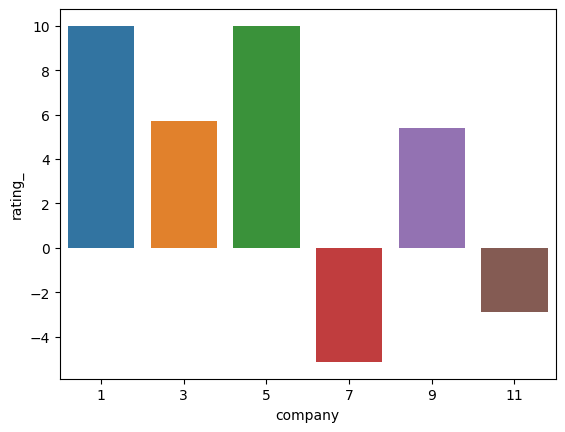

In [59]:
def make_compare_df(group_by_value):
    df_compare=(
        pd.merge(melted_df1,df_group_upload,on=['telecomp','month'])
        .groupby(group_by_value).agg(
            plan=('plan','sum'),
            fact=('TVR','sum')).reset_index()
        )
    df_compare[['fact','plan']] = df_compare[['fact','plan']].apply(pd.to_numeric)
    df_compare['TVR_deviation'] = (df_compare['fact'] - df_compare['plan']) / df_compare['plan'] * 100


    return df_compare

df_compare = make_compare_df(['month'])

df_compare['rating_'] = df_compare['TVR_deviation'].apply(calculate_rating)

df_compare= df_compare.rename(columns={'month':"company"})
group_by_company = df_compare[['company','rating_']]
sns.barplot(data=group_by_company,x='company',y='rating_')
group_by_company

<Axes: xlabel='company', ylabel='rating_'>

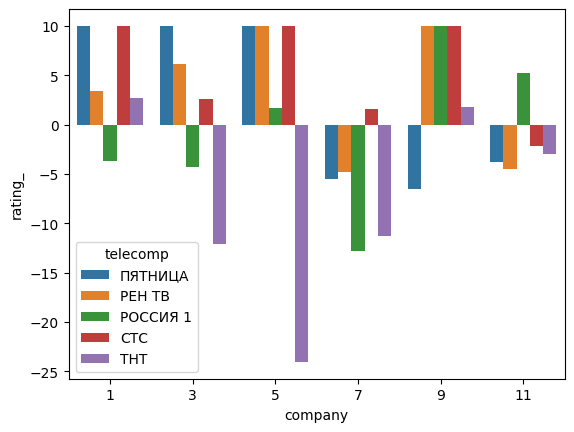

In [63]:

by_company= make_compare_df(group_by_value=["month",'telecomp',])[['month',"TVR_deviation",'telecomp',]]
by_company['rating_'] = by_company['TVR_deviation'].apply(calculate_rating)

by_company = by_company.rename(columns={"month":"company"})
by_company.sort_values(by='company',ascending=True)
by_company
sns.barplot(data=by_company,x='company',y='rating_',hue="telecomp")
# by_company

In [138]:

totals = df_compare.sum(numeric_only=True)

totals['telecomp'] = 'Итого'
df_compare = pd.concat([df_compare, pd.DataFrame(totals).T], ignore_index=True)    


df_compare[['fact','plan']] = df_compare[['fact','plan']].apply(pd.to_numeric)
df_compare['TVR_deviation'] = (df_compare['fact'] - df_compare['plan']) / df_compare['plan'] * 100
df_compare

categories = [-float('inf'),-10,-5,0,5,10, float('inf')]
ratings = [0, 2, 4, 6, 8,10]

df_compare = df_compare[['telecomp','plan','fact','TVR_deviation']]

df_compare['client_rating'] = pd.cut(df_compare['TVR_deviation'], bins=categories, labels=ratings)

customer_rating = df_compare[['telecomp','client_rating']].rename(columns={'TVR_deviation':'customer_rating'})
general_rating = customer_rating.iloc[-1,:]

general_rating

telecomp         Итого
client_rating        6
Name: 5, dtype: object

In [139]:
import matplotlib.pyplot as plt
import seaborn as sns

## Графики 


<Axes: xlabel='company', ylabel='TVR_deviation'>

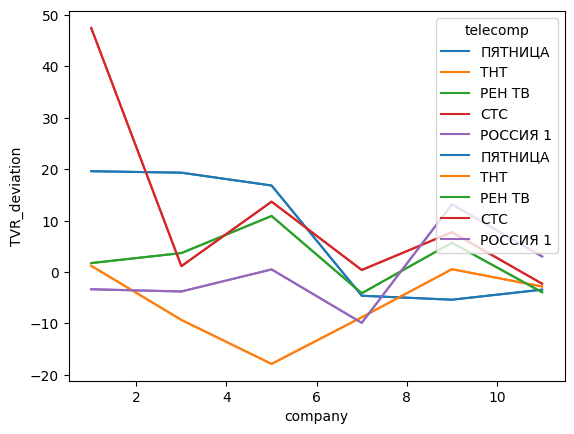

In [45]:
# telecomp	month	
df_compare_comp=(
    pd.merge(melted_df1,df_group_upload,on=['telecomp','month'])
    .groupby(['telecomp','month']).agg(
        plan=('plan','sum'),
        fact=('TVR','sum')).reset_index()
    )

df_compare_comp[['fact','plan']] = df_compare_comp[['fact','plan']].apply(pd.to_numeric)
df_compare_comp['TVR_deviation'] = (df_compare_comp['fact'] - df_compare_comp['plan']) / df_compare_comp['plan'] * 100
df = df_compare_comp[['telecomp','TVR_deviation','month','fact']]
df = df.rename(columns={"month":"company"})
sns.lineplot(data=df.sort_values(by='company'),x='company',y='TVR_deviation',hue='telecomp')

# telecomp	month	
df_compare_comp=(
    pd.merge(melted_df1,df_group_upload,on=['telecomp','month'])
    .groupby(['telecomp','month']).agg(
        plan=('plan','sum'),
        fact=('TVR','sum')).reset_index()
    )

df_compare_comp[['fact','plan']] = df_compare_comp[['fact','plan']].apply(pd.to_numeric)
df_compare_comp['TVR_deviation'] = (df_compare_comp['fact'] - df_compare_comp['plan']) / df_compare_comp['plan'] * 100
df = df_compare_comp[['telecomp','TVR_deviation','month','fact']]
df = df.rename(columns={"month":"company"})
sns.lineplot(data=df.sort_values(by='company'),x='company',y='TVR_deviation',hue='telecomp')

<Axes: xlabel='telecomp', ylabel='audience'>

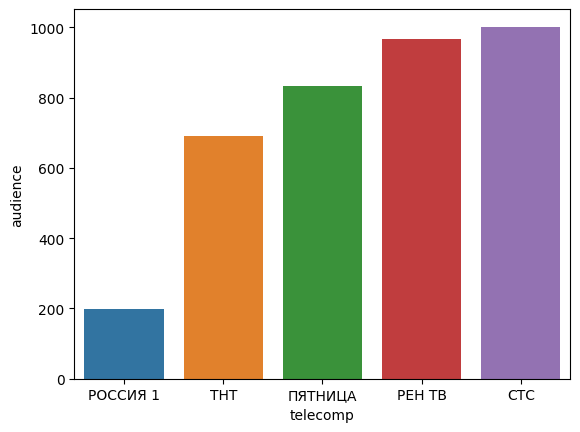

In [141]:
df.groupby('telecomp',as_index=False).agg(audience=("fact",'sum'))

sns.barplot(
    data=df.groupby('telecomp',as_index=False)
        .agg(audience=("fact",'sum'))
        .sort_values(by="audience"),
    y="audience",
    x="telecomp",
    )

# Рейтинг компаний друг относительно друга
## 1. quantile

In [15]:
# by every month quanilte
df = df_compare
q10 = df['TVR_deviation'].quantile(0.1)
q90 = df['TVR_deviation'].quantile(0.9)

df['rating_by_distribute'] = np.where(df['TVR_deviation'] < q10, 0, np.where(df['TVR_deviation'] > q90, 10, ((df['TVR_deviation'] - q10) / (q90 - q10)) * 10))

# Rounding ratings to nearest integer
df['rating_by_distribute'] = df['rating_by_distribute'].round().astype(int)
rating_analog = df[['telecomp',"TVR_deviation","client_rating",'rating_by_distribute']]
rating_analog

,telecomp,TVR_deviation,client_rating,rating_by_distribute
0,ПЯТНИЦА,7.219726,8,8
1,РЕН ТВ,2.345781,6,4
2,РОССИЯ 1,-0.177142,4,2
3,СТС,11.486599,10,10
4,ТНТ,-6.253938,2,0
5,Итого,3.802142,6,6


# Plotly

In [ ]:
import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots